<a href="https://colab.research.google.com/github/gituserhjlee/dataexercise/blob/master/coronaData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium

In [3]:
coronaDF=pd.read_csv('covid_19_clean_complete.csv')

In [4]:
coronaDF

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
48280,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-24,860,14,610,236,Africa
48281,NaN,Yemen,15.552727,48.516388,2020-07-24,1674,469,779,426,Eastern Mediterranean
48282,NaN,Comoros,-11.645500,43.333300,2020-07-24,340,7,324,9,Africa
48283,NaN,Tajikistan,38.861000,71.276100,2020-07-24,7104,58,5851,1195,Europe


In [5]:
coronaDF.isnull().sum()


Province/State    33855
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [6]:
coronaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48285 entries, 0 to 48284
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14430 non-null  object 
 1   Country/Region  48285 non-null  object 
 2   Lat             48285 non-null  float64
 3   Long            48285 non-null  float64
 4   Date            48285 non-null  object 
 5   Confirmed       48285 non-null  int64  
 6   Deaths          48285 non-null  int64  
 7   Recovered       48285 non-null  int64  
 8   Active          48285 non-null  int64  
 9   WHO Region      48285 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [7]:
coronaDF['Date']=pd.to_datetime(coronaDF['Date'])

In [8]:
coronaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48285 entries, 0 to 48284
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14430 non-null  object        
 1   Country/Region  48285 non-null  object        
 2   Lat             48285 non-null  float64       
 3   Long            48285 non-null  float64       
 4   Date            48285 non-null  datetime64[ns]
 5   Confirmed       48285 non-null  int64         
 6   Deaths          48285 non-null  int64         
 7   Recovered       48285 non-null  int64         
 8   Active          48285 non-null  int64         
 9   WHO Region      48285 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [9]:
latestDF=coronaDF[coronaDF['Date']==max(coronaDF['Date'])]

In [10]:
latestDF

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48024,NaN,Afghanistan,33.939110,67.709953,2020-07-24,35981,1225,24602,10154,Eastern Mediterranean
48025,NaN,Albania,41.153300,20.168300,2020-07-24,4570,128,2608,1834,Europe
48026,NaN,Algeria,28.033900,1.659600,2020-07-24,26159,1136,17369,7654,Africa
48027,NaN,Andorra,42.506300,1.521800,2020-07-24,897,52,803,42,Europe
48028,NaN,Angola,-11.202700,17.873900,2020-07-24,880,35,241,604,Africa
...,...,...,...,...,...,...,...,...,...,...
48280,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-24,860,14,610,236,Africa
48281,NaN,Yemen,15.552727,48.516388,2020-07-24,1674,469,779,426,Eastern Mediterranean
48282,NaN,Comoros,-11.645500,43.333300,2020-07-24,340,7,324,9,Africa
48283,NaN,Tajikistan,38.861000,71.276100,2020-07-24,7104,58,5851,1195,Europe


In [12]:
latest_country_sum=latestDF.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [13]:
latest_country_sum

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,35981,1225,24602
1,Albania,4570,128,2608
2,Algeria,26159,1136,17369
3,Andorra,897,52,803
4,Angola,880,35,241
...,...,...,...,...
182,West Bank and Gaza,10093,70,2720
183,Western Sahara,10,1,8
184,Yemen,1674,469,779
185,Zambia,3856,136,1677


In [16]:
latest_country_sum=latest_country_sum.sort_values(by='Confirmed', ascending=False).reset_index(drop=True)

In [17]:
latest_country_sum

,Country/Region,Confirmed,Deaths,Recovered
0,US,4112531,145546,1261624
1,Brazil,2287475,85238,1693214
2,India,1337024,31358,849432
3,Russia,799499,13026,587728
4,South Africa,421996,6343,245771
...,...,...,...,...
182,Dominica,18,0,18
183,Saint Kitts and Nevis,17,0,15
184,Greenland,13,0,13
185,Holy See,12,0,12


In [20]:
latest_country_sum.style.background_gradient(cmap='Blues')

,Country/Region,Confirmed,Deaths,Recovered
0,US,4112531,145546,1261624
1,Brazil,2287475,85238,1693214
2,India,1337024,31358,849432
3,Russia,799499,13026,587728
4,South Africa,421996,6343,245771
5,Mexico,378285,42645,283382
6,Peru,375961,17843,259423
7,Chile,341304,8914,313696
8,United Kingdom,299500,45762,1425
9,Iran,286523,15289,249212


In [22]:
date_status=coronaDF.groupby('Date')['Confirmed','Deaths','Recovered'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [27]:
date_status.sort_index()
date_status.style

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22 00:00:00,555,17,28
2020-01-23 00:00:00,654,18,30
2020-01-24 00:00:00,941,26,36
2020-01-25 00:00:00,1434,42,39
2020-01-26 00:00:00,2118,56,52
2020-01-27 00:00:00,2927,82,61
2020-01-28 00:00:00,5578,131,107
2020-01-29 00:00:00,6166,133,125
2020-01-30 00:00:00,8234,171,141


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


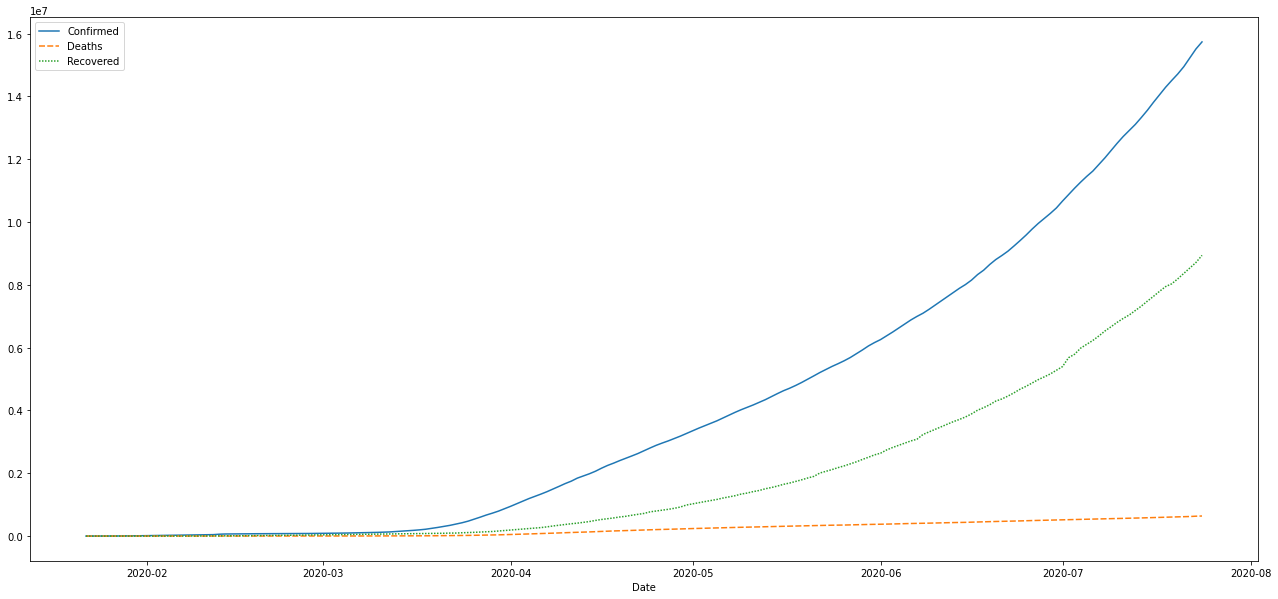

In [29]:
plt.figure(figsize=(22,10))
import seaborn as sns
sns.lineplot(data=date_status)

In [31]:
folium.Map()

In [42]:
map=folium.Map(location=[37.502840, 126.947847],zoom_start=12)

In [44]:
folium.CircleMarker([37.502840, 126.947847], radius=100, color='red',fill=True, fill_color='Blue',popup='here').add_to(map)
map

In [54]:
map=folium.Map(location=[0,0],zoom_start=4)
for a in latestDF.index:
  folium.CircleMarker([latestDF['Lat'][a], latestDF['Long'][a]], radius=int(latestDF['Confirmed'][a]/10000), color='blue',fill=True, fill_color='Blue',popup=latestDF['Country/Region'][a]+":"+str(latestDF['Confirmed'][a])).add_to(map)
map